In [1]:
# from sympy import symbols, cos, sin
# from sympy.plotting import plot_parametric
import sympy as sym
import numpy as np
beta  = sym.symbols('beta')
alpha = sym.symbols('alpha')
x     = sym.symbols('x')
Q0    = 340.
xs    = 0.95
A=211.1
B=1.55
Tsnow = -10.
sx    = 1 - 0.241*(3*x**2-1)

In [2]:
I_ave = Q0 * ( (beta-alpha)*(1.241*xs - 0.241*xs**3) +alpha )

In [3]:

T_ave = (I_ave - A)/B

In [4]:
T_ave.subs({alpha:0.4,beta:0.7})

15.5334888709677

In [5]:
T_ave.subs({alpha:0.45})

213.283672580645*beta - 133.461523629032

In [60]:
# 计算1题beta
alpha_new = 0.45
beta_new = sym.solve(T_ave.subs({alpha:alpha_new}) - T_ave.subs({alpha:0.4,beta:0.7}),beta)
print(beta_new[0])

0.698576739125041


In [31]:
# 计算二题C
# Tsnow = -10.
Isnow = A + B*Tsnow
C = (Isnow - (alpha+beta)/2 *Q0*sx.subs({x:xs})) * B / (I_ave - Isnow)
C.subs({alpha:alpha_new,beta:beta_new[0].evalf()})

3.16024594121668

In [67]:
# 计算三题 Q(xs)
I_change = Q0*((beta-alpha)*(1.241*x - 0.241*x*x*x) + alpha)
Qxs = (1+C/B) * (A + B*Tsnow) / ( (C/B)*I_change/Q0 + sx * (alpha+beta)/2 )/ Q0
Qx_old = Qxs.subs({alpha:0.4,beta:0.7})
Qx_old

1.81888562238671/(-0.156288171623262*x**3 - 0.39765*x**2 + 0.804786809064181*x + 1.54721484992123)

In [68]:

Qx_new = Qxs.subs({alpha:alpha_new,beta:beta_new[0].evalf()})
Qx_new

1.74824308558251/(-0.122142474223929*x**3 - 0.415210491193702*x**2 + 0.628957719966375*x + 1.63018262375451)

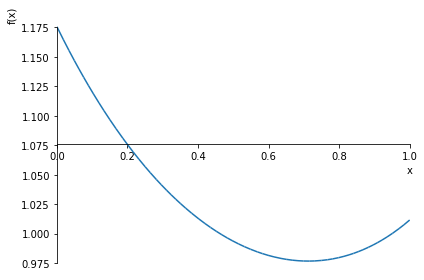

In [70]:
# from sympy import symbols
from sympy.plotting import plot
# x = symbols('x')
p1 = plot(Qx_old, (x,0,1),show=False)
# p2 = plot(Qx_new, (x,0,1), show=False)
# p1.extend(p2)
p1.show()

In [69]:
Qx_old.subs({x:0.95})

1.00000000000000

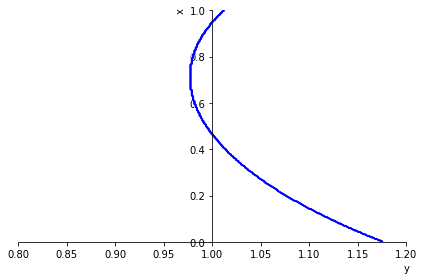

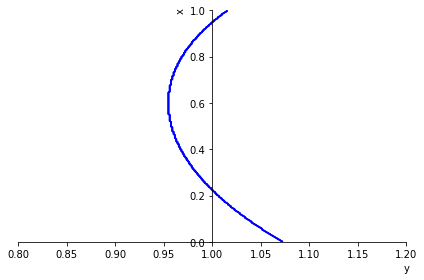

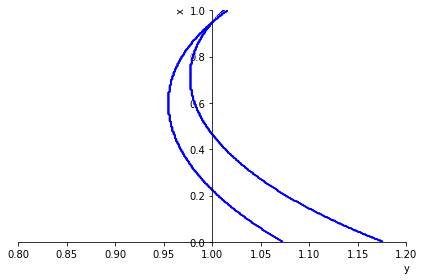

In [74]:
# from sympy import plot_implicit, cos, sin, symbols, Eq, And
y = sym.symbols('y')
p1 = sym.plot_implicit(sym.Eq(y,Qx_old),(y,0.8,1.2),(x,0,1),adaptive=False)
p2 = sym.plot_implicit(sym.Eq(y,Qx_new),(y,0.8,1.2),(x,0,1),adaptive=False)
# p2 = plot(Qx_new, (x,0,1), show=False)
p1.extend(p2)
p1.show()